### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier, XGBRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

# Soil Classification

In [4]:
df = pd.read_csv("encoded_dataset.csv")
df.head()

,Year,CONDITION,PROGRESS,PRICE RECEIVED,STOCKS,SALES,YIELD,Moisture,sand_per,slit_per,...,Available Water Capacity,ksat,slope,elev,Period_Sin,Period_Cos,State_Enc,Commodity_Enc,Soil_Texture_Enc,Soil_Fertility_Enc
0,2001,15.032714,0.000000,93.690957,6.807783e+07,26.143550,88.897867,17.694558,44.419561,36.947814,...,0.133178,2.526759,8.747191,847.556262,0.866025,-0.5,0,0.055558,1,1
1,2001,9.049112,77.173252,80.989201,5.455668e+07,15.649264,9.000000,17.694558,44.419561,36.947814,...,0.133178,2.526759,8.747191,847.556262,0.866025,-0.5,0,0.042887,1,1
2,2001,11.218004,49.266514,193.929250,2.403578e+07,15.827956,38.747395,17.694558,44.419561,36.947814,...,0.133178,2.526759,8.747191,847.556262,0.866025,-0.5,0,0.091092,1,1
3,2001,8.421371,87.856842,107.126311,-8.116681e+06,15.025129,34.958325,30.319766,30.212887,43.360425,...,0.159023,2.105647,4.806374,722.120788,0.866025,-0.5,1,0.145340,1,1
4,2001,15.451718,16.000000,95.319574,7.351657e+07,19.517770,88.897867,12.812133,42.378984,37.459818,...,0.136471,2.525177,8.312716,827.443154,0.866025,-0.5,2,0.055558,1,1


In [5]:
soil_features = [
    'Moisture', 'sand_per', 'slit_per', 'clay_per',
    'Available Water Capacity', 'ksat', 'slope', 'elev',
    'Period_Sin', 'Period_Cos', 'State_Enc'
]

X_soil = df[soil_features]
y_texture = df['Soil_Texture_Enc']
y_fertility = df['Soil_Fertility_Enc']

In [6]:
# Train-Test Split
X_train_tex, X_test_tex, y_train_tex, y_test_tex = train_test_split(
    X_soil, y_texture, test_size=0.2, random_state=42, stratify=y_texture
)

# Random Forest Classifier with all CPUs
texture_clf = RandomForestClassifier(
    n_estimators=100, random_state=42, n_jobs=-1
)

texture_clf.fit(X_train_tex, y_train_tex)

y_train_pred_tex = texture_clf.predict(X_train_tex)
y_test_pred_tex = texture_clf.predict(X_test_tex)

print("\nSoil Texture - Train Classification Report:")
print(classification_report(y_train_tex, y_train_pred_tex))

print("\nSoil Texture - Test Classification Report:")
print(classification_report(y_test_tex, y_test_pred_tex))

# Accuracy
print("Train Accuracy:", accuracy_score(y_train_tex, y_train_pred_tex))
print("Test Accuracy:", accuracy_score(y_test_tex, y_test_pred_tex))


Soil Texture - Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2501
           1       1.00      1.00      1.00     55470
           2       1.00      1.00      1.00       958
           3       1.00      1.00      1.00      9511

    accuracy                           1.00     68440
   macro avg       1.00      1.00      1.00     68440
weighted avg       1.00      1.00      1.00     68440


Soil Texture - Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       626
           1       1.00      1.00      1.00     13868
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00      2378

    accuracy                           1.00     17111
   macro avg       1.00      1.00      1.00     17111
weighted avg       1.00      1.00      1.00     17111

Train Accuracy: 1.0
Test Accuracy: 1.0


In [7]:
# Train-Test Split
X_train_fert, X_test_fert, y_train_fert, y_test_fert = train_test_split(
    X_soil, y_fertility, test_size=0.2, random_state=42, stratify=y_fertility
)

# XGBoost Classifier with GPU acceleration
fertility_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)
fertility_clf.fit(X_train_fert, y_train_fert)

y_train_pred_fert = fertility_clf.predict(X_train_fert)
y_test_pred_fert = fertility_clf.predict(X_test_fert)

print("\nSoil Fertility - Train Classification Report:")
print(classification_report(y_train_fert, y_train_pred_fert))

print("\nSoil Fertility - Test Classification Report:")
print(classification_report(y_test_fert, y_test_pred_fert))

# Accuracy
print("Train Accuracy:", accuracy_score(y_train_fert, y_train_pred_fert))
print("Test Accuracy:", accuracy_score(y_test_fert, y_test_pred_fert))


Soil Fertility - Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83     10939
           1       0.95      1.00      0.97     57067
           2       1.00      0.85      0.92       434

    accuracy                           0.95     68440
   macro avg       0.98      0.85      0.91     68440
weighted avg       0.96      0.95      0.95     68440


Soil Fertility - Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82      2735
           1       0.94      1.00      0.97     14268
           2       1.00      0.77      0.87       108

    accuracy                           0.95     17111
   macro avg       0.98      0.82      0.89     17111
weighted avg       0.95      0.95      0.95     17111

Train Accuracy: 0.9531414377556984
Test Accuracy: 0.9489801881830402


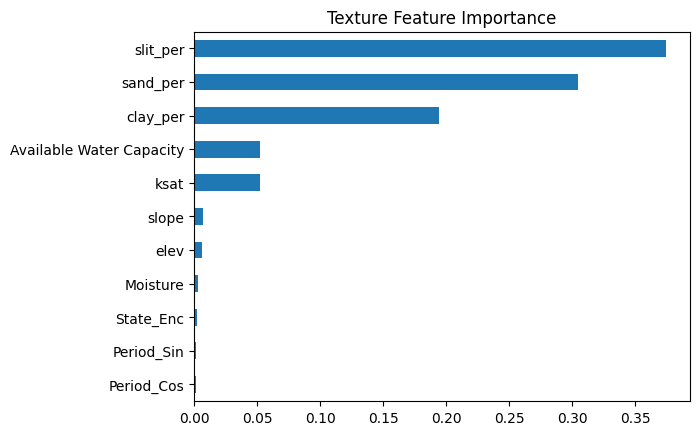

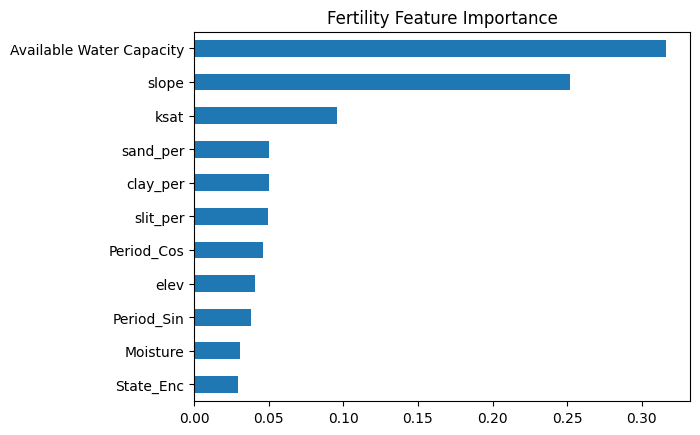

In [8]:
pd.Series(texture_clf.feature_importances_, index=X_soil.columns).sort_values().plot(kind='barh', title="Texture Feature Importance")
plt.show()

pd.Series(fertility_clf.feature_importances_, index=X_soil.columns).sort_values().plot(kind='barh', title="Fertility Feature Importance")
plt.show()

# Crop Yeild Regression Model

In [10]:
# Prepare Features and Target
X = df.drop('YIELD', axis=1)
y = df['YIELD']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100, random_state=42, n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Regressor Performance:")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_rf)):.2f}")
print(f"Train R²: {r2_score(y_train, y_train_pred_rf):.4f}")
print('-----------------------')
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_rf):.4f}")

Random Forest Regressor Performance:
Train RMSE: 75.76
Train R²: 0.9932
-----------------------
Test RMSE: 197.33
Test R²: 0.9547


In [12]:
# XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=400,          
    learning_rate=0.03,        
    max_depth=10,               
    subsample=0.8,             
    colsample_bytree=0.8,      
    reg_alpha=0,              
    reg_lambda=1,             
    tree_method='hist',
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Regressor Performance:")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)):.2f}")
print(f"Train R²: {r2_score(y_train, y_train_pred_xgb):.4f}")
print('-----------------------')
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_xgb):.4f}")

XGBoost Regressor Performance:
Train RMSE: 46.57
Train R²: 0.9974
-----------------------
Test RMSE: 201.40
Test R²: 0.9528


In [16]:
# Cross-Validation
rfscores = cross_val_score(rf_model, X, y, cv=3, scoring='r2', n_jobs=-1)
print("Cross-validated R² scores:", rfscores)
print("Mean CV R²:", np.mean(rfscores))

Cross-validated R² scores: [0.9532888  0.9199592  0.89220418]
Mean CV R²: 0.9218173942579576


In [17]:
# Cross-Validation
xgbscores = cross_val_score(xgb_model, X, y, cv=3, scoring='r2', n_jobs=-1)
print("Cross-validated R² scores:", xgbscores)
print("Mean CV R²:", np.mean(xgbscores))

Cross-validated R² scores: [0.95249232 0.92466229 0.89057684]
Mean CV R²: 0.9225771515439279


In [18]:
# Save all models
joblib.dump(texture_clf, 'texture_classifier.pkl')
joblib.dump(fertility_clf, 'fertility_classifier.pkl')
joblib.dump(rf_model, 'yield_rf_model.pkl')
joblib.dump(xgb_model, 'yield_xgb_model.pkl')

print(" All models saved successfully!")

 All models saved successfully!


In [19]:
def plot_actual_vs_predicted(y_true, y_pred, title="Actual vs. Predicted"):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.4, color='dodgerblue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # ideal line
    plt.xlabel("Actual Yield")
    plt.ylabel("Predicted Yield")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

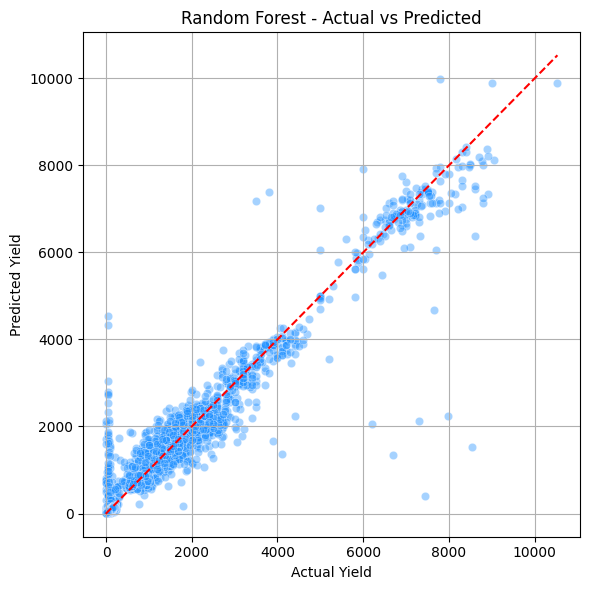

RMSE: 197.33
R²: 0.9547


In [20]:
plot_actual_vs_predicted(y_test, y_pred_rf, title="Random Forest - Actual vs Predicted")

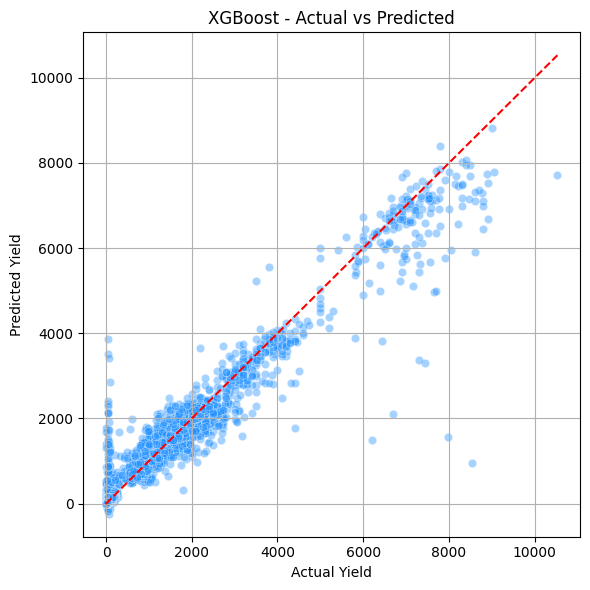

RMSE: 201.40
R²: 0.9528


In [21]:
plot_actual_vs_predicted(y_test, y_pred_xgb, title="XGBoost - Actual vs Predicted")

In [22]:
meta_model = Ridge(alpha=1.0)

# Ensemble
stacking_model = StackingRegressor(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=meta_model,
    passthrough=False,
    n_jobs=-1
)

# Train
stacking_model.fit(X_train, y_train)

# Predict
y_train_pred_stack = stacking_model.predict(X_train)
y_test_pred_stack = stacking_model.predict(X_test)

In [23]:
def print_regression_metrics(y_true, y_pred, dataset_name=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} RMSE: {rmse:.2f}")
    print(f"{dataset_name} R²: {r2:.4f}")

print("Stacking Regressor Performance:")
print_regression_metrics(y_train, y_train_pred_stack, "Train")
print("----------------------------")
print_regression_metrics(y_test, y_test_pred_stack, "Test")

Stacking Regressor Performance:
Train RMSE: 54.41
Train R²: 0.9965
----------------------------
Test RMSE: 190.79
Test R²: 0.9577


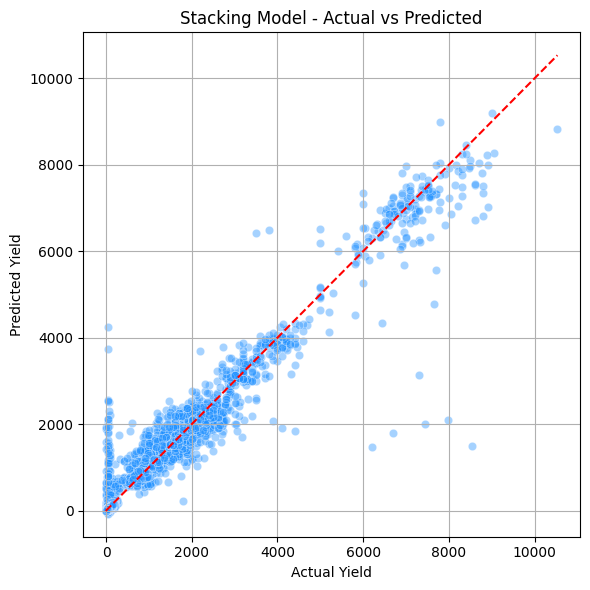

RMSE: 190.79
R²: 0.9577


In [24]:
plot_actual_vs_predicted(y_test, y_test_pred_stack, title="Stacking Model - Actual vs Predicted")

In [25]:
joblib.dump(stacking_model, 'stacking_model_optimized.pkl')
print("Stacking model saved as 'stacking_model_optimized.pkl'")

Stacking model saved as 'stacking_model_optimized.pkl'


In [60]:
def halving_tune_model(model, param_grid, X, y, max_resources, resource='n_estimators', cv=2, factor=2, scoring='r2', verbose=1):
    tuner = HalvingRandomSearchCV(
        estimator=model,
        param_distributions=param_grid,
        resource=resource,
        max_resources=max_resources,
        factor=factor,
        scoring=scoring,
        cv=cv,
        random_state=42,
        n_jobs=-1,
        verbose=verbose
    )
    tuner.fit(X, y)
    return tuner.best_estimator_

In [84]:
def tune_rf_xgb_models(X, y):
    rf = RandomForestRegressor(random_state=42)
    rf_params = {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    best_rf = halving_tune_model(rf, rf_params, X, y, max_resources=400)

    xgb = XGBRegressor(tree_method='hist', random_state=42, n_jobs=-1)
    xgb_params = {
        'max_depth': [6, 8, 10, 12],
        'learning_rate': [0.01, 0.03, 0.05],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.6, 0.7, 0.8],
        'gamma': [0, 0.1, 0.3],
        'reg_alpha': [0, 0.5, 1.0],
        'reg_lambda': [1.0, 1.5, 2.0]
    }
    best_xgb = halving_tune_model(xgb, xgb_params, X, y, max_resources=500)

    return best_rf, best_xgb

In [64]:
def evaluate_model(name, y_train, y_train_pred, y_test, y_test_pred):
    print(f"{name} Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
    print(f"{name} Train R²:   {r2_score(y_train, y_train_pred):.4f}")
    print(f"{name} Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
    print(f"{name} Test R²:    {r2_score(y_test, y_test_pred):.4f}")

In [86]:
best_rf, best_xgb = tune_rf_xgb_models(X_train, y_train)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 9
min_resources_: 1
max_resources_: 400
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 72
n_resources: 1
Fitting 2 folds for each of 72 candidates, totalling 144 fits
----------
iter: 1
n_candidates: 36
n_resources: 2
Fitting 2 folds for each of 36 candidates, totalling 72 fits
----------
iter: 2
n_candidates: 18
n_resources: 4
Fitting 2 folds for each of 18 candidates, totalling 36 fits
----------
iter: 3
n_candidates: 9
n_resources: 8
Fitting 2 folds for each of 9 candidates, totalling 18 fits
----------
iter: 4
n_candidates: 5
n_resources: 16
Fitting 2 folds for each of 5 candidates, totalling 10 fits
----------
iter: 5
n_candidates: 3
n_resources: 32
Fitting 2 folds for each of 3 candidates, totalling 6 fits
----------
iter: 6
n_candidates: 2
n_resources: 64
Fitting 2 folds for each of 2 candidates, totalling 4 fits
n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 9
min_resource

In [96]:
print("Best Random Forest Parameters:")
rf_selected_params = {
    'max_depth': best_rf.max_depth,
    'max_features': best_rf.max_features,
    'min_samples_split': best_rf.min_samples_split,
    'min_samples_leaf': best_rf.min_samples_leaf,
    'n_estimators': best_rf.n_estimators
}
print(rf_selected_params)

print("\nBest XGBoost Parameters:")
xgb_selected_params = {
    'colsample_bytree': best_xgb.colsample_bytree,
    'gamma': best_xgb.gamma,
    'learning_rate': best_xgb.learning_rate,
    'max_depth': best_xgb.max_depth,
    'n_estimators': best_xgb.n_estimators,
    'reg_alpha': best_xgb.reg_alpha,
    'reg_lambda': best_xgb.reg_lambda,
    'subsample': best_xgb.subsample,
    'tree_method': best_xgb.tree_method,
    'n_jobs': best_xgb.n_jobs,
    'random_state': best_xgb.random_state
}
print(xgb_selected_params)

Best Random Forest Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 1, 'n_estimators': 64}

Best XGBoost Parameters:
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 256, 'reg_alpha': 1.0, 'reg_lambda': 1.5, 'subsample': 0.7, 'tree_method': 'hist', 'n_jobs': -1, 'random_state': 42}


In [87]:
stack_model = StackingRegressor(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1
)
stack_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_features='sqrt',
                                                     min_samples_split=5,
                                                     n_estimators=64,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=256, n_jobs=-1,
                                            num_parallel_tree=None, ...))],
                  final_estimator=Ridge(), n_jobs=-1)

In [88]:
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

StackingRegressor Train RMSE: 53.85
StackingRegressor Train R²:   0.9965
StackingRegressor Test RMSE:  203.39
StackingRegressor Test R²:    0.9519


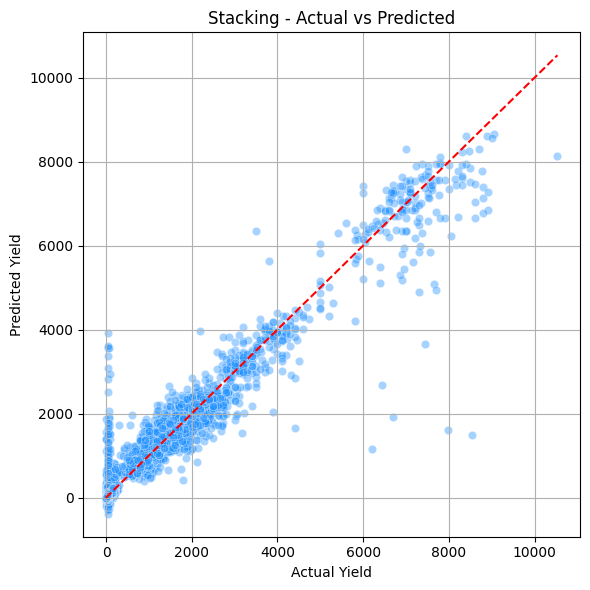

RMSE: 203.39
R²: 0.9519


In [89]:
evaluate_model("StackingRegressor", y_train, y_train_pred, y_test, y_test_pred)
plot_actual_vs_predicted(y_test, y_test_pred, "Stacking - Actual vs Predicted")